In [6]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Iterable

from simulation import simulate_repayment
from annual_monthly_transformers import get_monthly_discount_factor

In [7]:
def calculate_present_value(_repayments: Iterable[float], _annual_rpis: Iterable[float]) -> float:
    """
    Returns the Present Value of all future repayments
    """
    return np.sum(np.array(_repayments) / np.array(get_monthly_discount_factor(_annual_rpis)[:len(_repayments)]))

def months_till_clearance(_balance: Iterable[float]) -> int:
    """
    Returns the number of months until the debt is cleared in full
    """
    return np.sum(np.array(_balance) > 0)

# Repayment of varying total amounts

## Asumptions:

- The same annual income progression - starting with 25k and increasing 5% each year
- Constant inflation rate of 2%
- Varying total amounts to pay off - 30k, 40k, 50k

In [20]:
annual_rpis = [2 for _ in range(30)]
annual_salaries = [27000 * 1.05 ** i for i in range(30)]
total_debts = [30000, 40000, 50000]


repayments0, interest_added_0, balance_0 = simulate_repayment(loan_outstanding=total_debts[0], annual_rpis=annual_rpis, annual_salaries=annual_salaries)
repayments1, interest_added_1, balance_1 = simulate_repayment(loan_outstanding=total_debts[1], annual_rpis=annual_rpis, annual_salaries=annual_salaries)
repayments2, interest_added_2, balance_2 = simulate_repayment(loan_outstanding=total_debts[2], annual_rpis=annual_rpis, annual_salaries=annual_salaries)

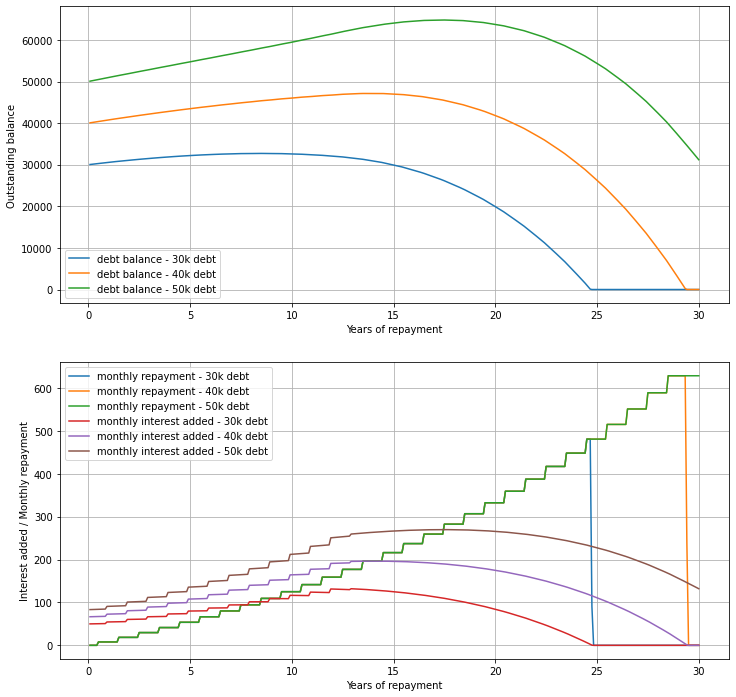

Present Value of repayments - 30k debt: 39875.91333007297 in 24.7 years
Present Value of repayments - 40k debt: 58041.834712295924 in 29.3 years
Present Value of repayments - 50k debt: 60687.536558547465 in 30.0 years


In [21]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
x_months = np.arange(1, len(balance_0)+1) / 12
ax[0].plot(x_months, balance_0, label="debt balance - 30k debt")
ax[0].plot(x_months, balance_1, label="debt balance - 40k debt")
ax[0].plot(x_months, balance_2, label="debt balance - 50k debt")
ax[0].grid()
ax[0].set_xlabel("Years of repayment")
ax[0].set_ylabel("Outstanding balance")
ax[0].legend()
ax[1].plot(x_months, repayments0, label="monthly repayment - 30k debt")
ax[1].plot(x_months, repayments1, label="monthly repayment - 40k debt")
ax[1].plot(x_months, repayments2, label="monthly repayment - 50k debt")
ax[1].plot(x_months, interest_added_0, label="monthly interest added - 30k debt")
ax[1].plot(x_months, interest_added_1, label="monthly interest added - 40k debt")
ax[1].plot(x_months, interest_added_2, label="monthly interest added - 50k debt")
ax[1].set_xlabel("Years of repayment")
ax[1].set_ylabel("Interest added / Monthly repayment")
ax[1].grid()
ax[1].legend()
plt.show()

pv_repayments0 = calculate_present_value(repayments0, annual_rpis)
pv_repayments1 = calculate_present_value(repayments1, annual_rpis)
pv_repayments2 = calculate_present_value(repayments2, annual_rpis)
years_repayments0 = months_till_clearance(balance_0) / 12
years_repayments1 = months_till_clearance(balance_1) / 12
years_repayments2 = months_till_clearance(balance_2) / 12

print(f"Present Value of repayments - 30k debt: {pv_repayments0} in {np.round(years_repayments0, 1)} years")
print(f"Present Value of repayments - 40k debt: {pv_repayments1} in {np.round(years_repayments1, 1)} years")
print(f"Present Value of repayments - 50k debt: {pv_repayments2} in {np.round(years_repayments2, 1)} years")

# Repayment with varying inflation rates

## Asumptions:

- The same annual income progression - starting with 25k and increasing 5% each year
- Constant amount to pay off - 30k
- Varying average inflation rates 2%, 3%, 4%

In [22]:
annual_rpi_2 = [2 for _ in range(30)]
annual_rpi_3 = [3 for _ in range(30)]
annual_rpi_4 = [4 for _ in range(30)]
annual_salaries = [27000 * 1.05 ** i for i in range(30)]
total_debt = 30000

repayments0, interest_added_0, balance_0 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpi_2, annual_salaries=annual_salaries)
repayments1, interest_added_1, balance_1 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpi_3, annual_salaries=annual_salaries)
repayments2, interest_added_2, balance_2 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpi_4, annual_salaries=annual_salaries)

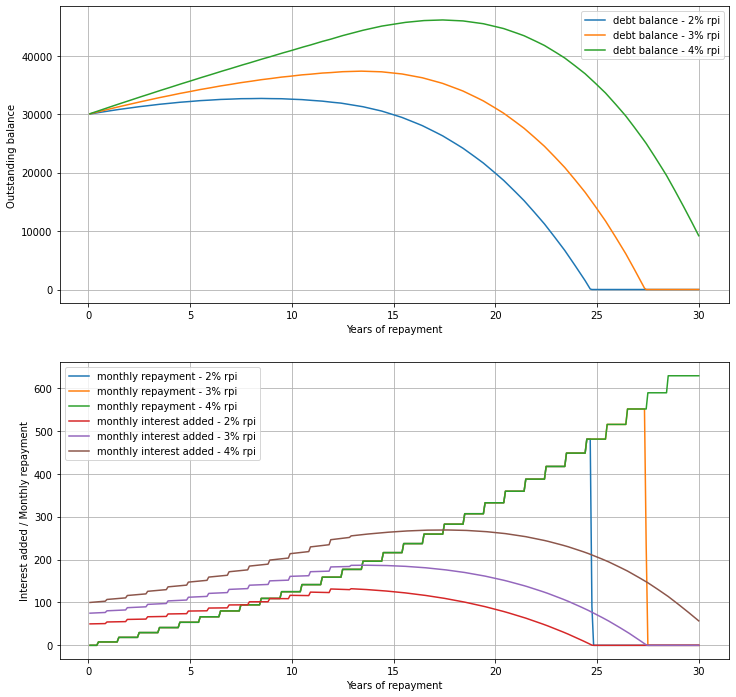

Present Value of repayments - 2% rpi: 39875.91333007297 in 24.7 years
Present Value of repayments - 3% rpi: 41432.28519255249 in 27.3 years
Present Value of repayments - 4% rpi: 40755.815511975816 in 30.0 years


In [23]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
x_months = np.arange(1, len(balance_0)+1) / 12
ax[0].plot(x_months, balance_0, label=r"debt balance - 2% rpi")
ax[0].plot(x_months, balance_1, label=r"debt balance - 3% rpi")
ax[0].plot(x_months, balance_2, label=r"debt balance - 4% rpi")
ax[0].set_xlabel("Years of repayment")
ax[0].set_ylabel("Outstanding balance")
ax[0].grid()
ax[0].legend()
ax[1].plot(x_months, repayments0, label=r"monthly repayment - 2% rpi")
ax[1].plot(x_months, repayments1, label=r"monthly repayment - 3% rpi")
ax[1].plot(x_months, repayments2, label=r"monthly repayment - 4% rpi")
ax[1].plot(x_months, interest_added_0, label=r"monthly interest added - 2% rpi")
ax[1].plot(x_months, interest_added_1, label=r"monthly interest added - 3% rpi")
ax[1].plot(x_months, interest_added_2, label=r"monthly interest added - 4% rpi")
ax[1].set_xlabel("Years of repayment")
ax[1].set_ylabel("Interest added / Monthly repayment")
ax[1].grid()
ax[1].legend()
plt.show()

pv_repayments0 = np.sum(np.array(repayments0) / np.array(get_monthly_discount_factor(annual_rpi_2)[:len(repayments0)]))
pv_repayments1 = np.sum(np.array(repayments1) / np.array(get_monthly_discount_factor(annual_rpi_3)[:len(repayments1)]))
pv_repayments2 = np.sum(np.array(repayments2) / np.array(get_monthly_discount_factor(annual_rpi_4)[:len(repayments2)]))
years_repayments0 = months_till_clearance(balance_0) / 12
years_repayments1 = months_till_clearance(balance_1) / 12
years_repayments2 = months_till_clearance(balance_2) / 12

print(f"Present Value of repayments - 2% rpi: {pv_repayments0} in {np.round(years_repayments0, 1)} years")
print(f"Present Value of repayments - 3% rpi: {pv_repayments1} in {np.round(years_repayments1, 1)} years")
print(f"Present Value of repayments - 4% rpi: {pv_repayments2} in {np.round(years_repayments2, 1)} years")

# Repayment with varying salary progressions

## Asumptions:

- Constant amount to pay off - 30k
- Constant average inflation rate - 2%
- Varying annual income progression - 23k with 3%, 27k with 5%, 50k with 15%

In [24]:
total_debt = 30000
annual_rpis = [2 for _ in range(30)]
annual_salaries_1 = [23000 * 1.03 ** i for i in range(30)]
annual_salaries_2 = [27000 * 1.05 ** i for i in range(30)]
annual_salaries_3 = [50000 * 1.15 ** i for i in range(30)]

repayments0, interest_added_0, balance_0 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries_1)
repayments1, interest_added_1, balance_1 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries_2)
repayments2, interest_added_2, balance_2 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries_3)

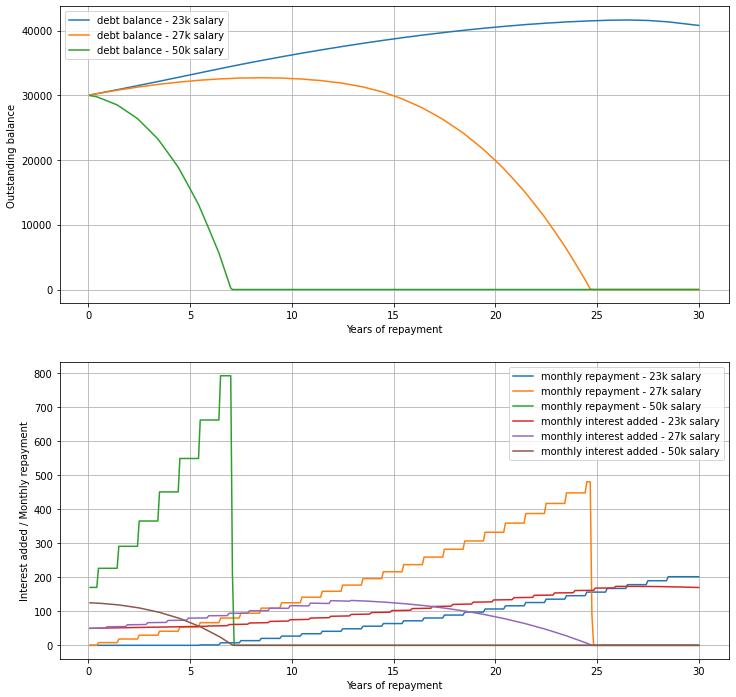

Present Value of repayments - 23k salary: 17708.764010640043 in 30.0 years
Present Value of repayments - 27k salary: 39875.91333007297 in 24.7 years
Present Value of repayments - 50k salary: 34076.614822391326 in 7.0 years


In [25]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
x_months = np.arange(1, len(balance_0)+1) / 12
ax[0].plot(x_months, balance_0, label=r"debt balance - 23k salary")
ax[0].plot(x_months, balance_1, label=r"debt balance - 27k salary")
ax[0].plot(x_months, balance_2, label=r"debt balance - 50k salary")
ax[0].set_xlabel("Years of repayment")
ax[0].set_ylabel("Outstanding balance")
ax[0].grid()
ax[0].legend()
ax[1].plot(x_months, repayments0, label=r"monthly repayment - 23k salary")
ax[1].plot(x_months, repayments1, label=r"monthly repayment - 27k salary")
ax[1].plot(x_months, repayments2, label=r"monthly repayment - 50k salary")
ax[1].plot(x_months, interest_added_0, label=r"monthly interest added - 23k salary")
ax[1].plot(x_months, interest_added_1, label=r"monthly interest added - 27k salary")
ax[1].plot(x_months, interest_added_2, label=r"monthly interest added - 50k salary")
ax[1].set_xlabel("Years of repayment")
ax[1].set_ylabel("Interest added / Monthly repayment")
ax[1].grid()
ax[1].legend()
plt.show()

pv_repayments0 = np.sum(np.array(repayments0) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments0)]))
pv_repayments1 = np.sum(np.array(repayments1) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments1)]))
pv_repayments2 = np.sum(np.array(repayments2) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments2)]))
years_repayments0 = months_till_clearance(balance_0) / 12
years_repayments1 = months_till_clearance(balance_1) / 12
years_repayments2 = months_till_clearance(balance_2) / 12

print(f"Present Value of repayments - 23k salary: {pv_repayments0} in {np.round(years_repayments0, 1)} years")
print(f"Present Value of repayments - 27k salary: {pv_repayments1} in {np.round(years_repayments1, 1)} years")
print(f"Present Value of repayments - 50k salary: {pv_repayments2} in {np.round(years_repayments2, 1)} years")

# Repayment with discretionary repayments

## Asumptions:

- Constant amount to pay off - 30k
- Constant average inflation rate - 2%
- Constant annual income progression - 40k with 10%
- Varying amounts of discretionary repayments - 0, 5k, 10k

In [27]:
total_debt = 30000
annual_rpis = [2 for _ in range(30)]
annual_salaries = [40000 * 1.05 ** i for i in range(30)]

repayments0, interest_added_0, balance_0 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries)
repayments1, interest_added_1, balance_1 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries, discretionary_repayments={0: 5000})
repayments2, interest_added_2, balance_2 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries, discretionary_repayments={0: 10000})

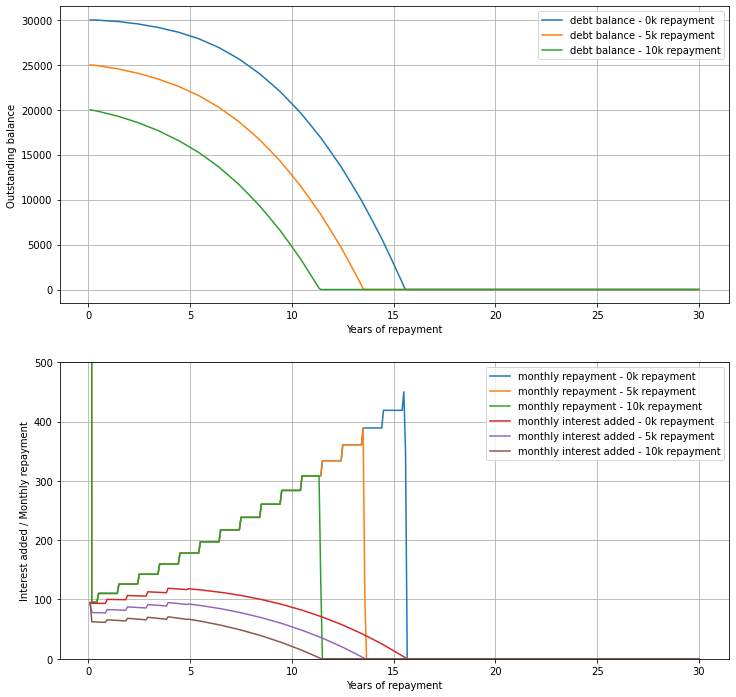

Present Value of repayments - 0k repayment: 38094.69994396529 in 15.5 years
Present Value of repayments - 5k repayment: 35613.15289549444 in 13.5 years
Present Value of repayments - 10k repayment: 33585.87962062675 in 11.3 years


In [29]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
x_months = np.arange(1, len(balance_0)+1) / 12
ax[0].plot(x_months, balance_0, label=r"debt balance - 0k repayment")
ax[0].plot(x_months, balance_1, label=r"debt balance - 5k repayment")
ax[0].plot(x_months, balance_2, label=r"debt balance - 10k repayment")
ax[0].set_xlabel("Years of repayment")
ax[0].set_ylabel("Outstanding balance")
ax[0].grid()
ax[0].legend()
ax[1].plot(x_months, repayments0, label=r"monthly repayment - 0k repayment")
ax[1].plot(x_months, repayments1, label=r"monthly repayment - 5k repayment")
ax[1].plot(x_months, repayments2, label=r"monthly repayment - 10k repayment")
ax[1].plot(x_months, interest_added_0, label=r"monthly interest added - 0k repayment")
ax[1].plot(x_months, interest_added_1, label=r"monthly interest added - 5k repayment")
ax[1].plot(x_months, interest_added_2, label=r"monthly interest added - 10k repayment")
ax[1].set_xlabel("Years of repayment")
ax[1].set_ylabel("Interest added / Monthly repayment")
ax[1].grid()
ax[1].legend()
ax[1].set_ylim(0, 500)
plt.show()

pv_repayments0 = np.sum(np.array(repayments0) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments0)]))
pv_repayments1 = np.sum(np.array(repayments1) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments1)]))
pv_repayments2 = np.sum(np.array(repayments2) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments2)]))
years_repayments0 = months_till_clearance(balance_0) / 12
years_repayments1 = months_till_clearance(balance_1) / 12
years_repayments2 = months_till_clearance(balance_2) / 12

print(f"Present Value of repayments - 0k repayment: {pv_repayments0} in {np.round(years_repayments0, 1)} years")
print(f"Present Value of repayments - 5k repayment: {pv_repayments1} in {np.round(years_repayments1, 1)} years")
print(f"Present Value of repayments - 10k repayment: {pv_repayments2} in {np.round(years_repayments2, 1)} years")

## Calculating the real (inflation adjusted) rate of return of each repayment _investments_ 

In [16]:
investment_5k_return = (1 + (pv_repayments0 - pv_repayments1) / 5000) ** (1 / (years_repayments0))
investment_10k_return = (1 + (pv_repayments0 - pv_repayments2) / 10000) ** (1 / (years_repayments0))

print(f"Annualised rate of return on debt repayment: {np.round((investment_5k_return - 1) * 100, 2)}%")
print(f"Annualised rate of return on debt repayment: {np.round((investment_10k_return - 1) * 100, 2)}%")

Annualised rate of return on debt repayment: 2.63%
Annualised rate of return on debt repayment: 2.43%


In [42]:
total_debt = 45000
annual_rpis = [2 for _ in range(30)]
annual_salaries = [27000 * 1.05 ** i for i in range(30)]

repayments0, interest_added_0, balance_0 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries)
repayments1, interest_added_1, balance_1 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries, discretionary_repayments={0: 5000})
repayments2, interest_added_2, balance_2 = simulate_repayment(loan_outstanding=total_debt, annual_rpis=annual_rpis, annual_salaries=annual_salaries, discretionary_repayments={0: 10000})

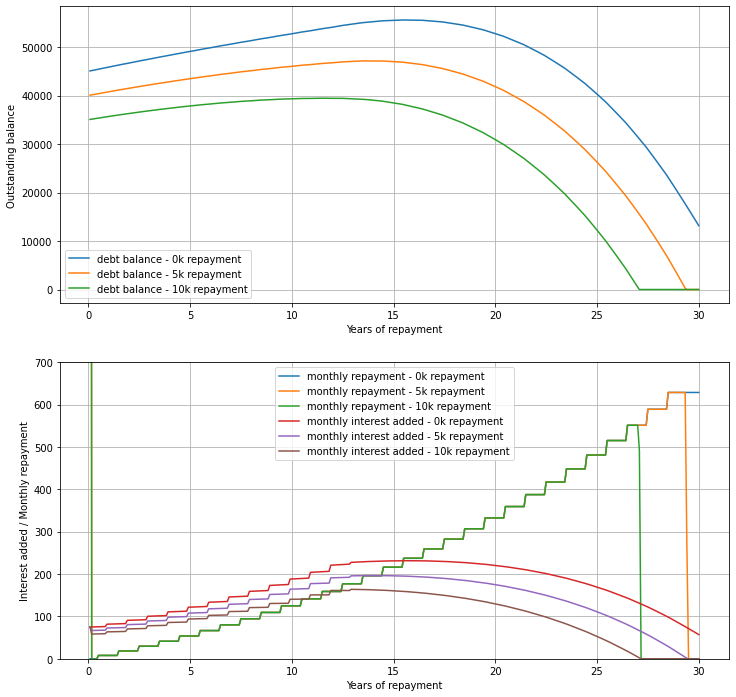

Present Value of repayments - 0k repayment: 60687.536558547465 in 30.0 years
Present Value of repayments - 5k repayment: 63049.702148822274 in 29.3 years
Present Value of repayments - 10k repayment: 58655.07707267297 in 27.0 years


In [46]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
x_months = np.arange(1, len(balance_0)+1) / 12
ax[0].plot(x_months, balance_0, label=r"debt balance - 0k repayment")
ax[0].plot(x_months, balance_1, label=r"debt balance - 5k repayment")
ax[0].plot(x_months, balance_2, label=r"debt balance - 10k repayment")
ax[0].set_xlabel("Years of repayment")
ax[0].set_ylabel("Outstanding balance")
ax[0].grid()
ax[0].legend()
ax[1].plot(x_months, repayments0, label=r"monthly repayment - 0k repayment")
ax[1].plot(x_months, repayments1, label=r"monthly repayment - 5k repayment")
ax[1].plot(x_months, repayments2, label=r"monthly repayment - 10k repayment")
ax[1].plot(x_months, interest_added_0, label=r"monthly interest added - 0k repayment")
ax[1].plot(x_months, interest_added_1, label=r"monthly interest added - 5k repayment")
ax[1].plot(x_months, interest_added_2, label=r"monthly interest added - 10k repayment")
ax[1].set_xlabel("Years of repayment")
ax[1].set_ylabel("Interest added / Monthly repayment")
ax[1].grid()
ax[1].legend()
ax[1].set_ylim(0, 700)
plt.show()

pv_repayments0 = np.sum(np.array(repayments0) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments0)]))
pv_repayments1 = np.sum(np.array(repayments1) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments1)]))
pv_repayments2 = np.sum(np.array(repayments2) / np.array(get_monthly_discount_factor(annual_rpis)[:len(repayments2)]))
years_repayments0 = months_till_clearance(balance_0) / 12
years_repayments1 = months_till_clearance(balance_1) / 12
years_repayments2 = months_till_clearance(balance_2) / 12

print(f"Present Value of repayments - 0k repayment: {pv_repayments0} in {np.round(years_repayments0, 1)} years")
print(f"Present Value of repayments - 5k repayment: {pv_repayments1} in {np.round(years_repayments1, 1)} years")
print(f"Present Value of repayments - 10k repayment: {pv_repayments2} in {np.round(years_repayments2, 1)} years")

In [44]:
investment_5k_return = (1 + (pv_repayments0 - pv_repayments1) / 5000) ** (1 / (years_repayments0))
investment_10k_return = (1 + (pv_repayments0 - pv_repayments2) / 10000) ** (1 / (years_repayments0))

print(f"Annualised rate of return on debt repayment: {np.round((investment_5k_return - 1) * 100, 2)}%")
print(f"Annualised rate of return on debt repayment: {np.round((investment_10k_return - 1) * 100, 2)}%")

Annualised rate of return on debt repayment: -2.11%
Annualised rate of return on debt repayment: 0.62%
